### Problem Statement

You are a data scientist / AI engineer working on a regression problem. You have been provided with the **Ames Housing dataset** to predict house sale prices.

Your task is to build and evaluate regression models. You will start with basic models and gradually move towards advanced models like **XGBoost Regressor**. Finally, you will explore various parameters of the XGBoost model to enhance performance.


**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Ames Housing Dataset Analysis

### Task 1: Data Preparation and Exploration
1. Import the data from `house_prices.csv`.
2. Display the number of rows and columns.
3. Display the first few rows.
4. Check for missing values and data types.
5. Generate descriptive statistics.

In [2]:
# Step 1: Import the data
df = pd.read_csv('house_prices.csv')

# Step 2: Display rows and columns
print(f'Shape: {df.shape}')

# Step 3: Display first few rows
display(df.head())

# Step 4: Check for missing values and data types
print(df.info())
print(df.isnull().sum())

# Step 5: Generate descriptive statistics
display(df.describe())

Shape: (1460, 9)


,GrLivArea,BedroomAbvGr,FullBath,TotalBsmtSF,GarageCars,YearBuilt,LotArea,OverallQual,SalePrice
0,1710,3,2,856,2,2003,8450,7,208500
1,1262,3,2,1262,2,1976,9600,6,181500
2,1786,3,2,920,2,2001,11250,7,223500
3,1717,3,1,756,3,1915,9550,7,140000
4,2198,4,2,1145,3,2000,14260,8,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   GarageCars    1460 non-null   int64
 5   YearBuilt     1460 non-null   int64
 6   LotArea       1460 non-null   int64
 7   OverallQual   1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB
None
GrLivArea       0
BedroomAbvGr    0
FullBath        0
TotalBsmtSF     0
GarageCars      0
YearBuilt       0
LotArea         0
OverallQual     0
SalePrice       0
dtype: int64


,GrLivArea,BedroomAbvGr,FullBath,TotalBsmtSF,GarageCars,YearBuilt,LotArea,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,1057.429452,1.767123,1971.267808,10516.828082,6.099315,180921.195890
std,525.480383,0.815778,0.550916,438.705324,0.747315,30.202904,9981.264932,1.382997,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1300.000000,1.000000,34900.000000
25%,1129.500000,2.000000,1.000000,795.750000,1.000000,1954.000000,7553.500000,5.000000,129975.000000
50%,1464.000000,3.000000,2.000000,991.500000,2.000000,1973.000000,9478.500000,6.000000,163000.000000
75%,1776.750000,3.000000,2.000000,1298.250000,2.000000,2000.000000,11601.500000,7.000000,214000.000000
max,5642.000000,8.000000,3.000000,6110.000000,4.000000,2010.000000,215245.000000,10.000000,755000.000000


### Task 2: Exploratory Data Analysis (EDA)
1. Visualize the distribution of the target variable `SalePrice`.
2. Create a correlation heatmap of all features including the target.

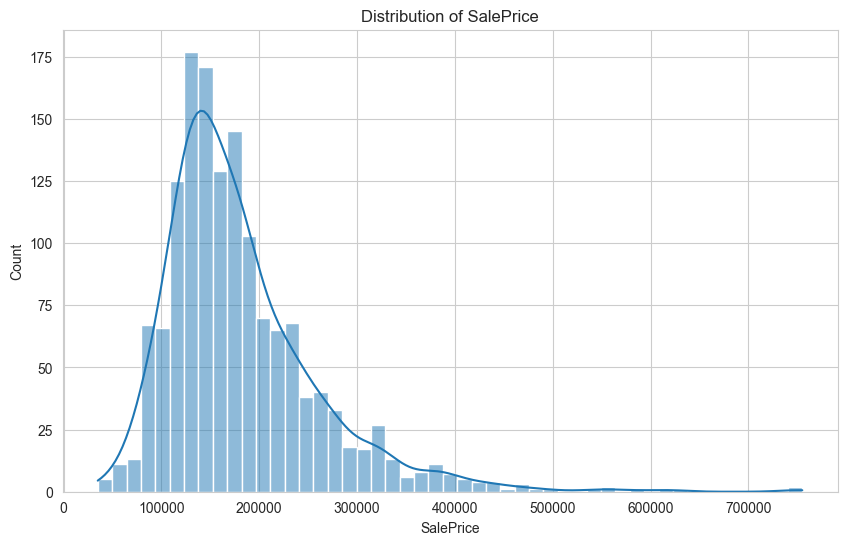

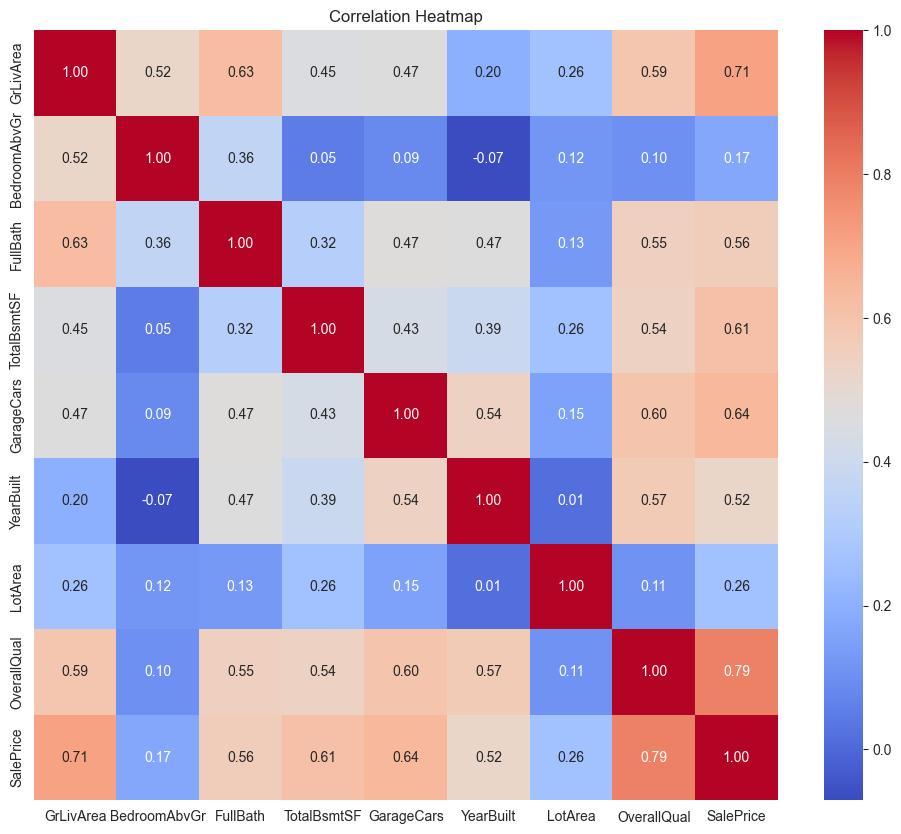

In [3]:
# Step 1: Distribution of target
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Step 2: Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Task 3: Model Training Using Basic Models
1. Split the data into training and test sets (80/20).
2. Train a Linear Regression model.
3. Train a Decision Tree Regressor.
4. Evaluate both using R2 Score, Mean Squared Error (MSE), and Mean Absolute Error (MAE).

In [4]:
# Step 1: Split data
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f'--- {model_name} ---')
    print(f'R2 Score: {r2_score(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print('\n')

# Step 2: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, 'Linear Regression')

# Step 3: Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model(y_test, y_pred_dt, 'Decision Tree Regressor')

--- Linear Regression ---
R2 Score: 0.8030
MSE: 1511402847.3722
MAE: 24533.4425


--- Decision Tree Regressor ---
R2 Score: 0.8039
MSE: 1503786923.6370
MAE: 25344.5411




### Task 4: Model Training Using XGBoost Regressor
1. Initialize and train an XGBoost Regressor model.
2. Evaluate the model using R2 Score, MSE, and MAE.
3. Display feature importances.

--- XGBoost Regressor ---
R2 Score: 0.8909
MSE: 837009920.0000
MAE: 19131.6777




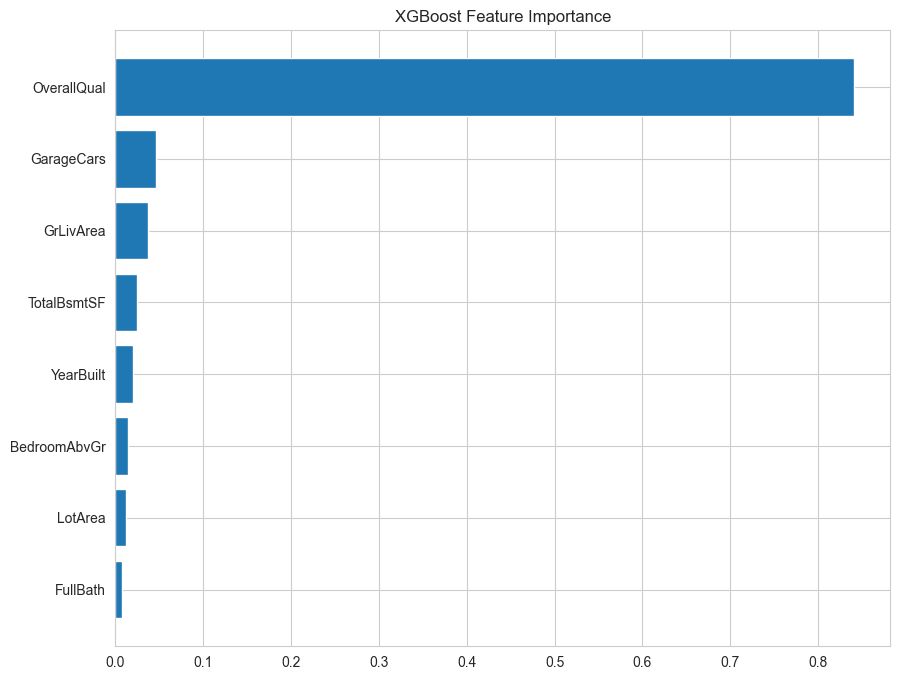

In [5]:
# Step 1: XGBoost Regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Step 2: Evaluation
evaluate_model(y_test, y_pred_xgb, 'XGBoost Regressor')

# Step 3: Feature Importances
plt.figure(figsize=(10,8))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][-20:], xgb.feature_importances_[sorted_idx][-20:])
plt.title('XGBoost Feature Importance')
plt.show()

### Task 5: Exploring Various Parameters in XGBoost Regressor
1. Train an XGBoost model with the following parameters:
    - `n_estimators`: Number of boosting rounds (e.g., 200)
    - `learning_rate`: Step size shrinkage to prevent overfitting (e.g., 0.05)
    - `max_depth`: Maximum depth of a tree (e.g., 5)
    - `subsample`: Subsample ratio of the training instance (e.g., 0.7)
    - `colsample_bytree`: Subsample ratio of columns when constructing each tree (e.g., 0.7)
2. Evaluate the tuned model and compare its performance to the default model.

In [6]:
# Step 1: Tuned XGBoost Regressor
xgb_tuned = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    objective='reg:squarederror'
)
xgb_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)

# Step 2: Evaluation
evaluate_model(y_test, y_pred_tuned, 'Tuned XGBoost Regressor')

--- Tuned XGBoost Regressor ---
R2 Score: 0.9063
MSE: 718402176.0000
MAE: 18072.9492


